In [ ]:
%pip install seaborn

In [80]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Get the Data and take a quick look

In [81]:
# get the data
power = pd.read_csv('Tetuan City power consumption.csv')

power.head()

,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
0,1/1/2017 0:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,1/1/2017 0:10,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,1/1/2017 0:20,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,1/1/2017 0:30,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,1/1/2017 0:40,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964


In [82]:
# Set the index to be the DateTime column
power = power.set_index('DateTime')

# Convert the index to datetime format
power.index = pd.to_datetime(power.index)

# drop Zone 2 and Zone 3 columns, as we are only interested in Zone 1
power = power.drop(columns=['Zone 2 Power Consumption', 'Zone 3 Power Consumption'])

power.head()

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption
DateTime,,,,,,
2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,34055.69620
2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,29814.68354
2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100,29128.10127
2017-01-01 00:30:00,6.121,75.0,0.083,0.091,0.096,28228.86076
2017-01-01 00:40:00,5.921,75.7,0.081,0.048,0.085,27335.69620


In [83]:
power.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 52416 entries, 2017-01-01 00:00:00 to 2017-12-30 23:50:00
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Temperature               52416 non-null  float64
 1   Humidity                  52416 non-null  float64
 2   Wind Speed                52416 non-null  float64
 3   general diffuse flows     52416 non-null  float64
 4   diffuse flows             52416 non-null  float64
 5   Zone 1 Power Consumption  52416 non-null  float64
dtypes: float64(6)
memory usage: 2.8 MB


In [84]:
power.describe()

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption
count,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000
mean,18.810024,68.259518,1.959489,182.696614,75.028022,32344.970564
std,5.815476,15.551177,2.348862,264.400960,124.210949,7130.562564
min,3.247000,11.340000,0.050000,0.004000,0.011000,13895.696200
25%,14.410000,58.310000,0.078000,0.062000,0.122000,26310.668692
50%,18.780000,69.860000,0.086000,5.035500,4.456000,32265.920340
75%,22.890000,81.400000,4.915000,319.600000,101.000000,37309.018185
max,40.010000,94.800000,6.483000,1163.000000,936.000000,52204.395120


# Discover trends and patterns in the data

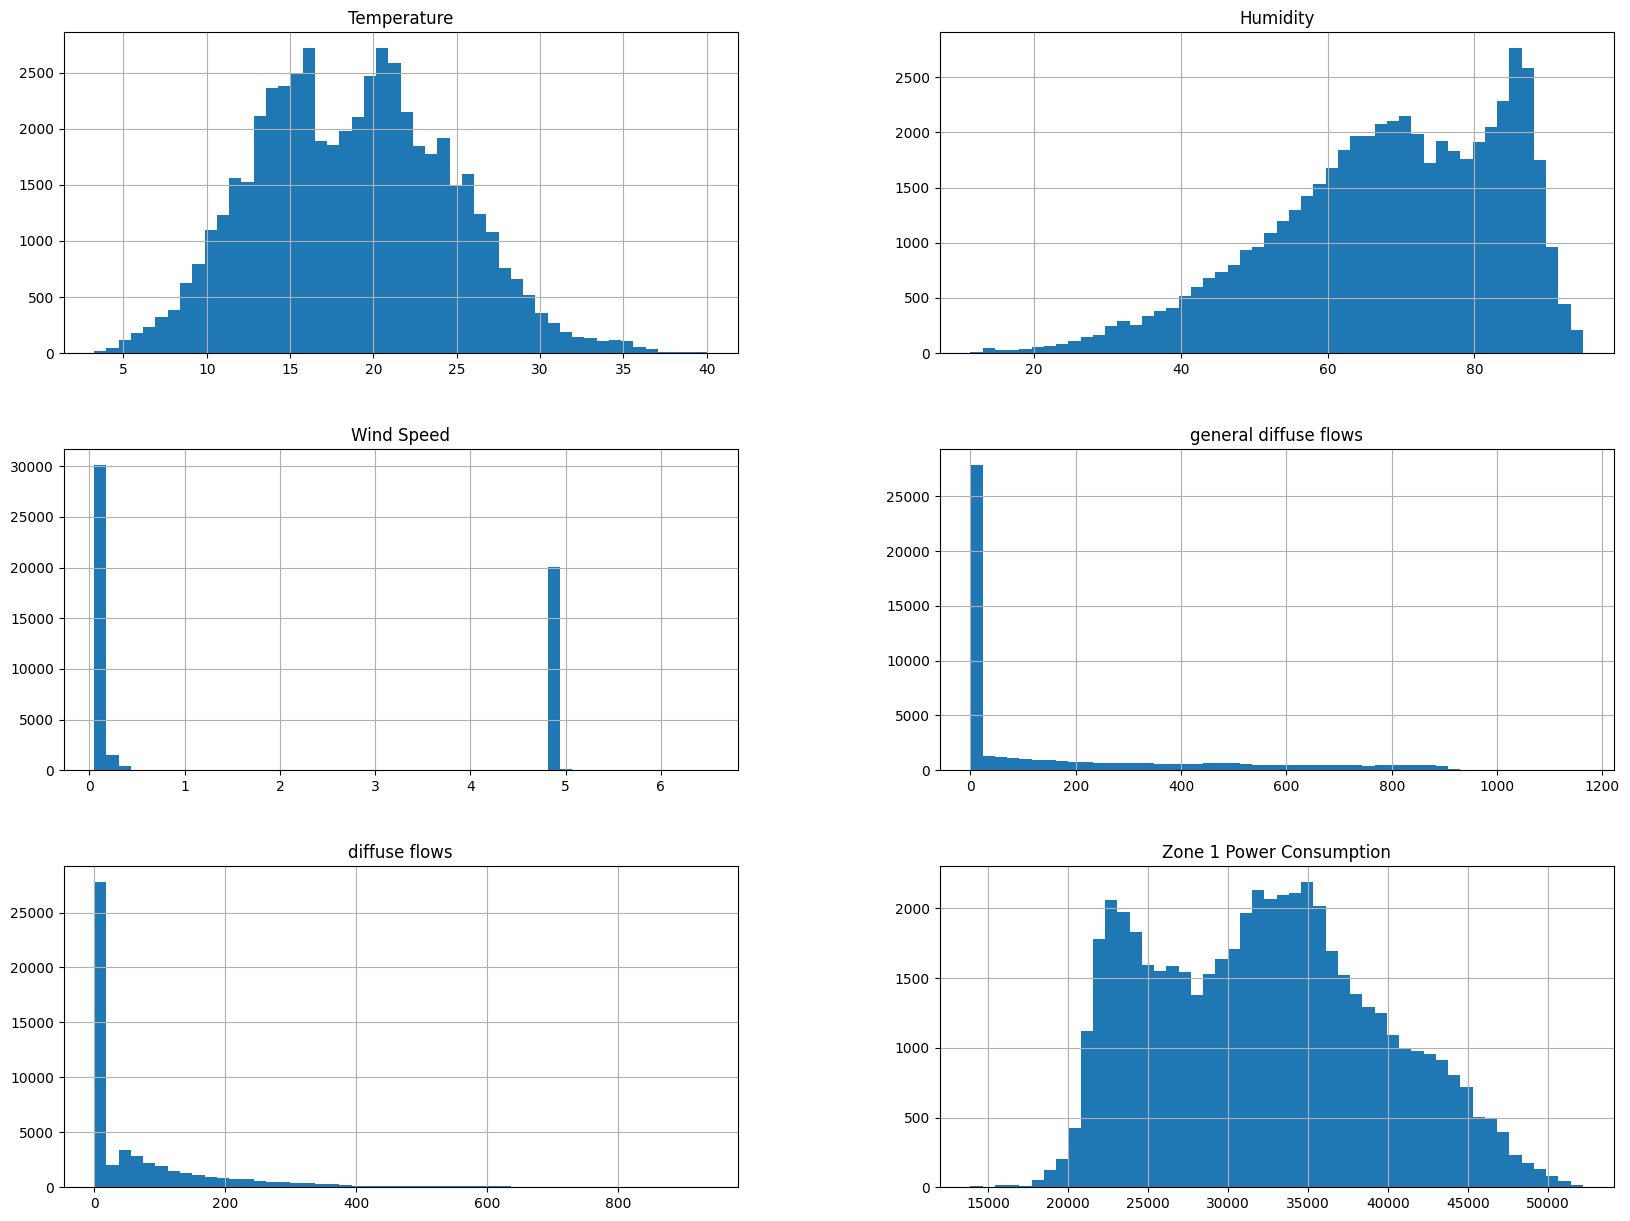

In [85]:
# Plot the histograms
power.hist(bins=50, figsize=(20,15))
plt.show()

In [86]:
# compute the correlation matrix
corr_matrix = power.corr()

corr_matrix['Zone 1 Power Consumption'].sort_values(ascending=False)

Zone 1 Power Consumption    1.000000
Temperature                 0.440221
general diffuse flows       0.187965
Wind Speed                  0.167444
diffuse flows               0.080274
Humidity                   -0.287421
Name: Zone 1 Power Consumption, dtype: float64

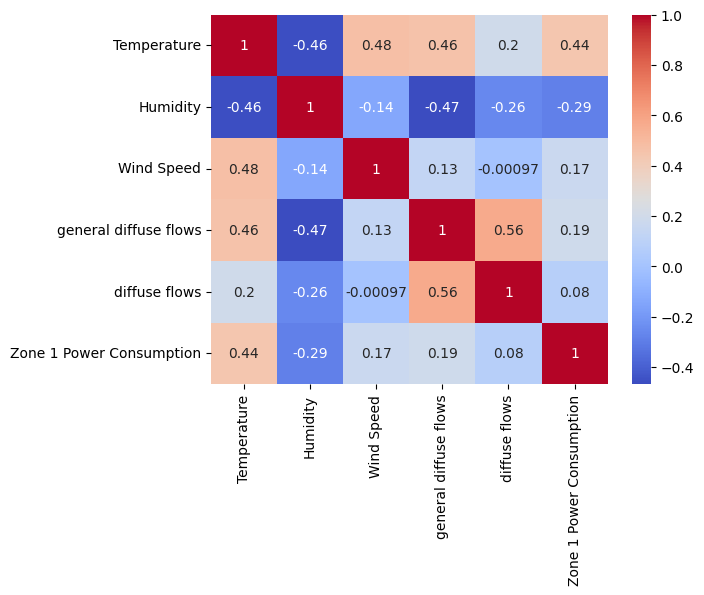

In [87]:
# visualize the correlation matrix
plt.figure()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

# Feature Engineering

In [88]:
# create features for hour, day, month, and year

def create_features(df):
    """
    Creates time series features from datetime index
    """
    df['hour'] = df.index.hour
    df['dayofweek'] = df.index.dayofweek
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofyear'] = df.index.dayofyear
    df['dayofmonth'] = df.index.day
    df['weekofyear'] = df.index.weekofyear
    
    return df

power = create_features(power)

C:\Users\yasir\AppData\Local\Temp\ipykernel_12708\653811134.py:14: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  df['weekofyear'] = df.index.weekofyear


In [89]:
# Smoothing the data by using Simple Moving Average (SMA)
power['SMA10'] = power['Zone 1 Power Consumption'].rolling(window=10).mean()
power['SMA15'] = power['Zone 1 Power Consumption'].rolling(window=15).mean()
power['SMA30'] = power['Zone 1 Power Consumption'].rolling(window=30).mean()

power.head()

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,SMA10,SMA15,SMA30
DateTime,,,,,,,,,,,,,,,,,
2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,34055.69620,0,6,1,1,2017,1,1,52,NaN,NaN,NaN
2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,29814.68354,0,6,1,1,2017,1,1,52,NaN,NaN,NaN
2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100,29128.10127,0,6,1,1,2017,1,1,52,NaN,NaN,NaN
2017-01-01 00:30:00,6.121,75.0,0.083,0.091,0.096,28228.86076,0,6,1,1,2017,1,1,52,NaN,NaN,NaN
2017-01-01 00:40:00,5.921,75.7,0.081,0.048,0.085,27335.69620,0,6,1,1,2017,1,1,52,NaN,NaN,NaN


# Visualize the features and their relationships

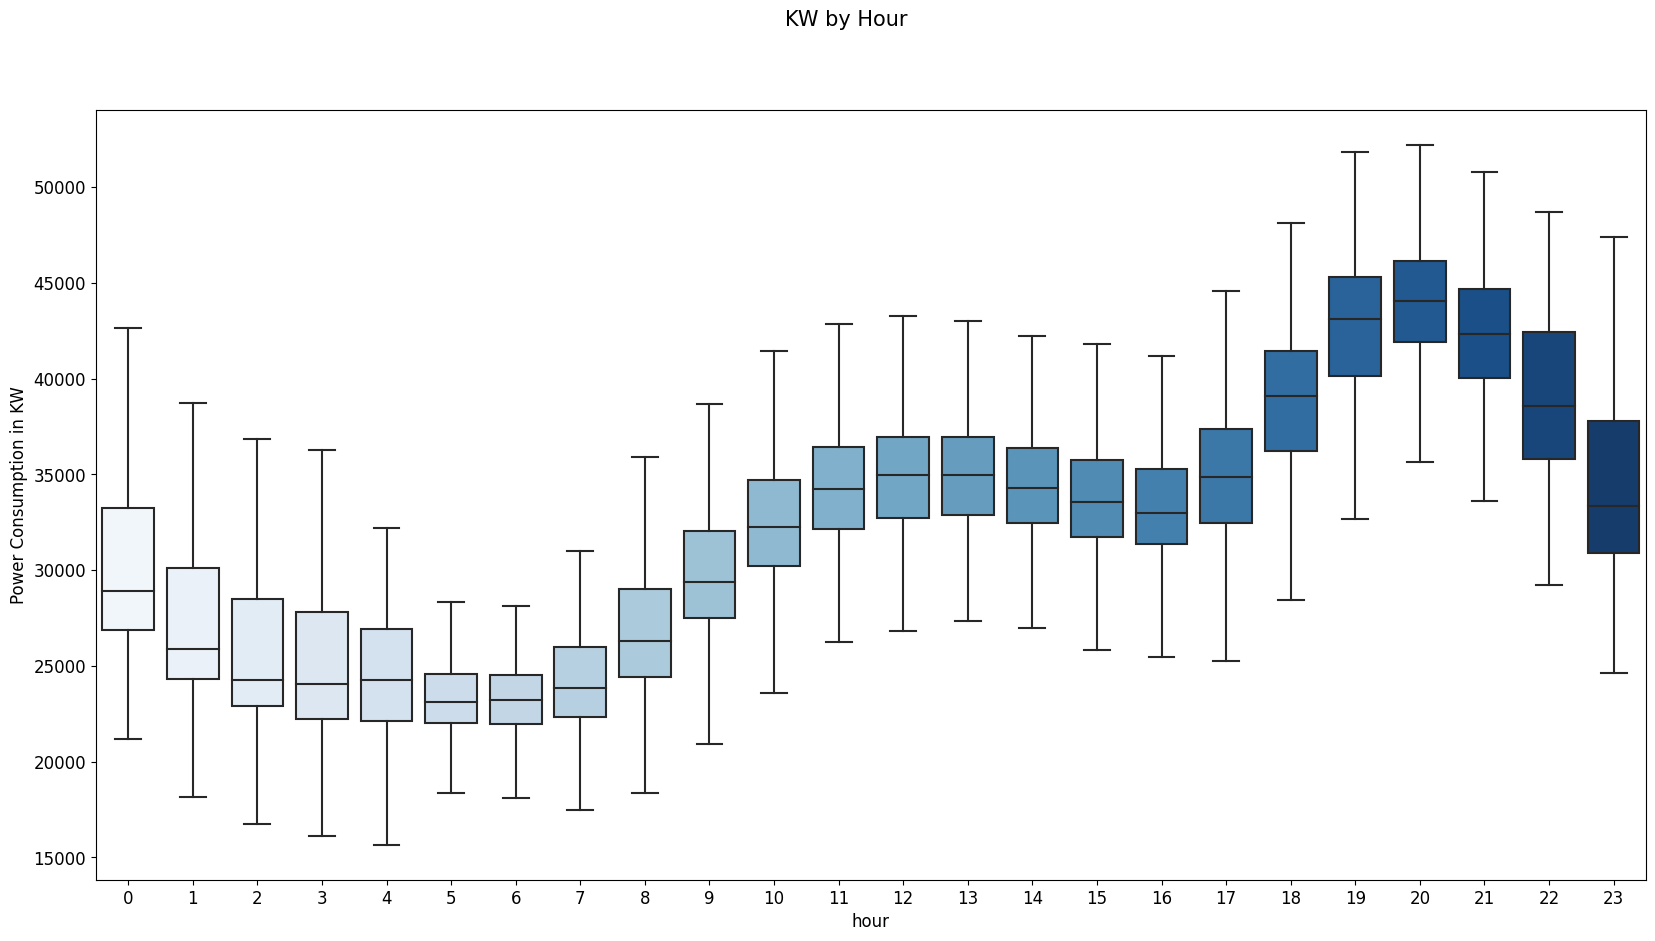

In [90]:
fig, ax = plt.subplots(figsize=(20, 10))

zone1 = sns.boxplot(data=power, x='hour', y='Zone 1 Power Consumption', palette = 'Blues', showfliers=False)

plt.suptitle('KW by Hour', fontsize=15)
plt.xlabel('hour', fontsize=12)
plt.ylabel('Power Consumption in KW', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

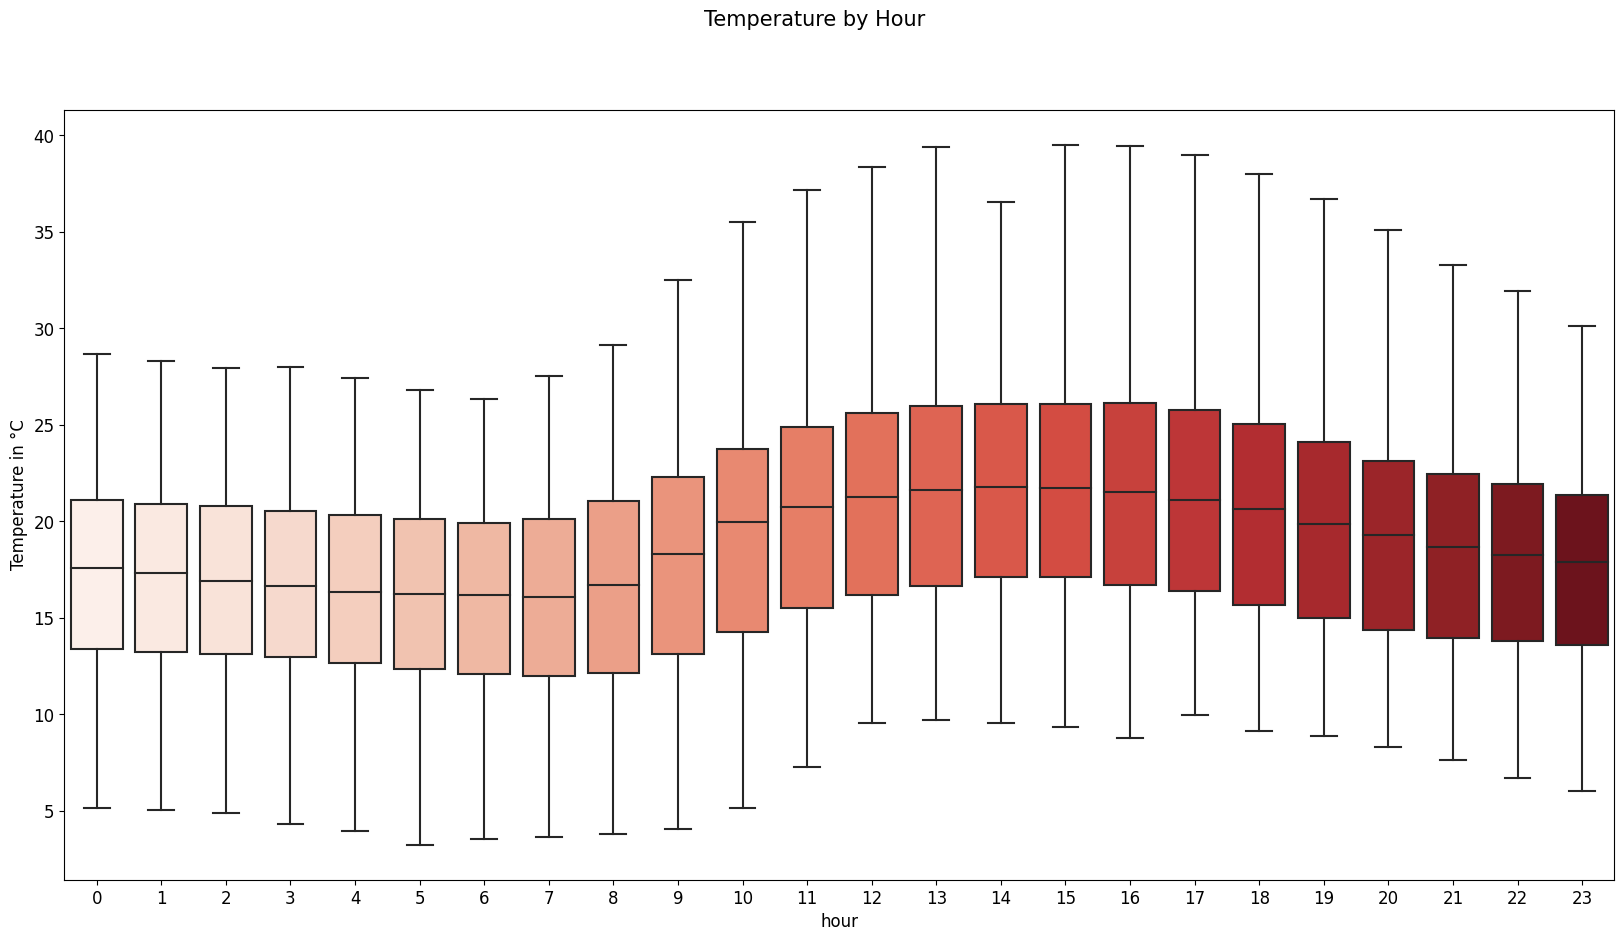

In [91]:
fig, ax = plt.subplots(figsize=(20, 10))

sns.boxplot(data=power, x='hour', y='Temperature', palette = 'Reds', showfliers=False)

plt.suptitle('Temperature by Hour', fontsize=15)
plt.xlabel('hour', fontsize=12)
plt.ylabel('Temperature in °C', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

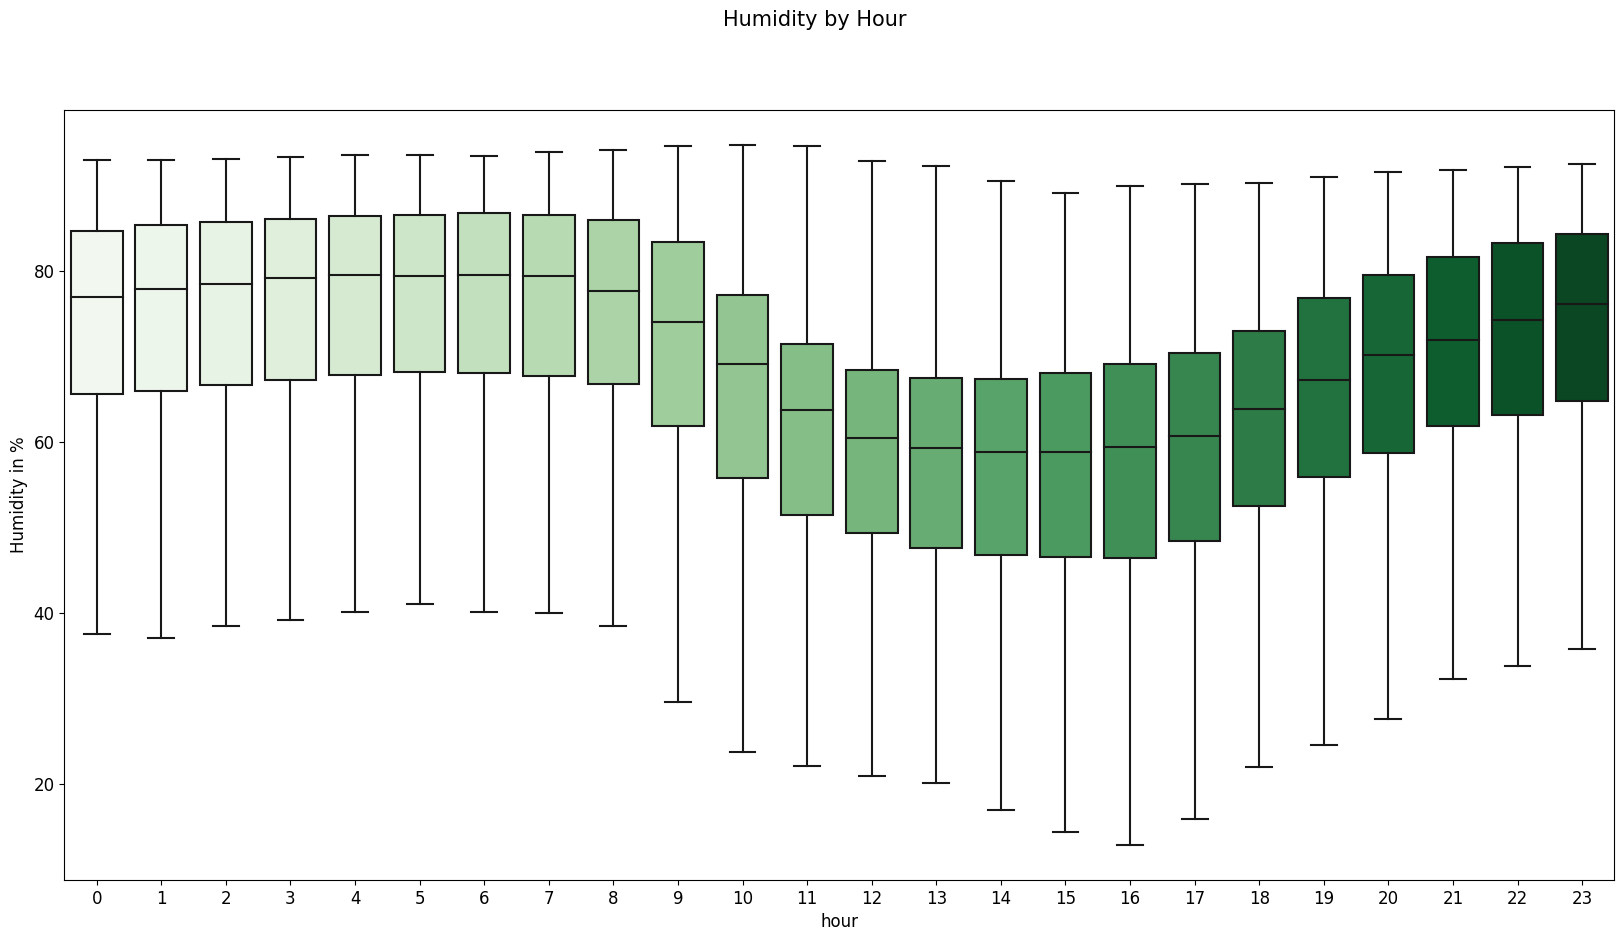

In [92]:
fig, ax = plt.subplots(figsize=(20, 10))

sns.boxplot(data=power, x='hour', y='Humidity', palette = 'Greens', showfliers=False)

plt.suptitle('Humidity by Hour', fontsize=15)
plt.xlabel('hour', fontsize=12)
plt.ylabel('Humidity in %', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

# Split the data into training and test sets

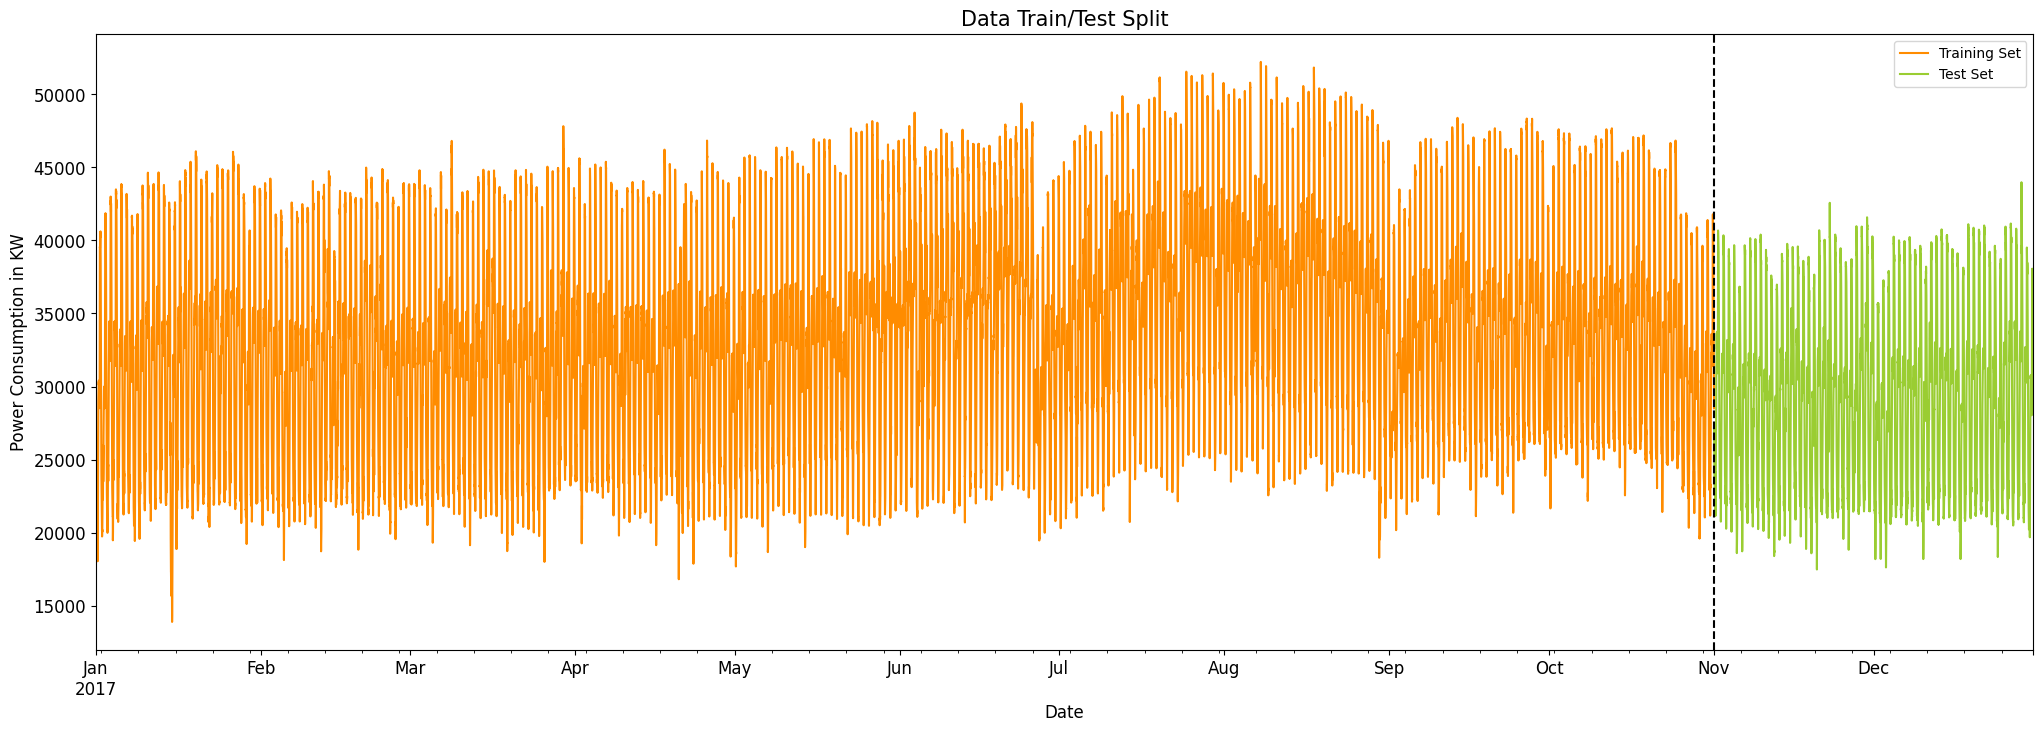

In [93]:
#Train and Test Split
zone_1 = power['Zone 1 Power Consumption']

train = zone_1.loc[zone_1.index < '2017-11-01']
test = zone_1.loc[zone_1.index >= '2017-11-01']

fig, ax = plt.subplots(figsize=(25, 8))

train.plot(ax=ax, label='Training Set', title='Data Train/Test Split', color="darkorange")
test.plot(ax=ax, label='Test Set', color="yellowgreen")

ax.axvline('2017-11-01', color='black', ls='--')
ax.legend(['Training Set', 'Test Set'])

plt.title('Data Train/Test Split', fontsize=15)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Power Consumption in KW', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

In [94]:
# check missing values
print(power.isnull().sum())

Temperature                  0
Humidity                     0
Wind Speed                   0
general diffuse flows        0
diffuse flows                0
Zone 1 Power Consumption     0
hour                         0
dayofweek                    0
quarter                      0
month                        0
year                         0
dayofyear                    0
dayofmonth                   0
weekofyear                   0
SMA10                        9
SMA15                       14
SMA30                       29
dtype: int64


In [95]:
power = power.dropna()

In [96]:
X_train = power.loc[:'2017-11-01',['Humidity', 'Temperature', 'Wind Speed', 'dayofyear', 'hour', 'dayofweek', 'quarter', 'month', 'year','SMA10', 'SMA15', 'SMA30']]
y_train = power.loc[:'2017-11-01', ['Zone 1 Power Consumption']]

In [97]:
X_test = power.loc['2017-11-01':,['Humidity', 'Temperature', 'Wind Speed', 'dayofyear', 'hour', 'dayofweek', 'quarter', 'month', 'year','SMA10', 'SMA15', 'SMA30']]
y_test = power.loc['2017-11-01':, ['Zone 1 Power Consumption']]

# Select, train and evaluate a model

In [ ]:
%pip install scikit-learn
%pip install xgboost

In [99]:
# Linear Regression
from sklearn.linear_model import LinearRegression
import xgboost as xgb
import sklearn.metrics as metrics

### Linear Regression model

In [100]:
# Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

LinearRegression()

In [101]:
# regression metrics
def evaluate_model(model, X, y):
    y_pred = model.predict(X)
    y_true = y

    rmse = np.sqrt(metrics.mean_squared_error(y_true, y_pred))

    return rmse

In [102]:
print('Linear Regression Score on training data:')
print(evaluate_model(linear_reg, X_train, y_train))

print('Linear Regression Score on test data:')
print(evaluate_model(linear_reg, X_test, y_test))

Linear Regression Score on training data:
1319.3466886765787
Linear Regression Score on test data:
1153.3630345001295


### XGBoost model

In [103]:
# XGBoost model
xgb_reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',    
                       n_estimators=1500,
                       objective='reg:squarederror',
                       max_depth=3,
                       learning_rate=0.3, 
                       random_state=21)

xgb_reg.fit(X_train, y_train,         
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=False)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.3, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1500, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=21, ...)

In [104]:
print('XGBoost Score on training data:')
print(evaluate_model(xgb_reg, X_train, y_train))

print('XGBoost Score on test data:')
print(evaluate_model(xgb_reg, X_test, y_test))

XGBoost Score on training data:
504.36129145149556
XGBoost Score on test data:
903.8234618464923


# Fine-tune the XGBoost model with hyperparameter tuning

In [105]:
# Search for best parameters for XGBoost model

cfg = {
    'n_estimators': [1000, 1500],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3]
}

def grid_search_xgb(X_train, y_train, X_test, y_test, cfg):
    best_score = float('inf')
    best_params = {}
    total_runs = len(cfg['n_estimators']) * len(cfg['max_depth']) * len(cfg['learning_rate'])
    print(f"Total runs: {total_runs}")
    i = 1
    for n_estimators in cfg['n_estimators']:
        for max_depth in cfg['max_depth']:
            for learning_rate in cfg['learning_rate']:
                print(f"Run {i} of {total_runs}")
                print(f"n_estimators: {n_estimators}, max_depth: {max_depth}, learning_rate: {learning_rate}")
                model = xgb.XGBRegressor(n_estimators=n_estimators, max_depth=max_depth, learning_rate=learning_rate)
                model.fit(X_train, y_train, eval_set=[(X_train, y_train)], verbose=False)
                score = evaluate_model(model, X_test, y_test)
                print(f"RMSE Score: {score}")
                if score < best_score:
                    best_score = score
                    best_params = {'n_estimators': n_estimators, 'max_depth': max_depth, 'learning_rate': learning_rate}
                i += 1

    return best_params, best_score

In [107]:
best_params, best_score = grid_search_xgb(X_train, y_train, X_test, y_test, cfg)
print("Best parameters: ", best_params)
print("Best score: ", best_score)

Total runs: 30
Run 1 of 30
n_estimators: 1000, max_depth: 3, learning_rate: 0.01
RMSE Score: 1211.2975106538036
Run 2 of 30
n_estimators: 1000, max_depth: 3, learning_rate: 0.05
RMSE Score: 1027.529873832097
Run 3 of 30
n_estimators: 1000, max_depth: 3, learning_rate: 0.1
RMSE Score: 883.1466453640722
Run 4 of 30
n_estimators: 1000, max_depth: 3, learning_rate: 0.2
RMSE Score: 908.0148564785569
Run 5 of 30
n_estimators: 1000, max_depth: 3, learning_rate: 0.3
RMSE Score: 906.9978043779951
Run 6 of 30
n_estimators: 1000, max_depth: 4, learning_rate: 0.01
RMSE Score: 1133.4725353900772
Run 7 of 30
n_estimators: 1000, max_depth: 4, learning_rate: 0.05
RMSE Score: 972.23586471578
Run 8 of 30
n_estimators: 1000, max_depth: 4, learning_rate: 0.1
RMSE Score: 907.8718914418096
Run 9 of 30
n_estimators: 1000, max_depth: 4, learning_rate: 0.2
RMSE Score: 970.8605158423841
Run 10 of 30
n_estimators: 1000, max_depth: 4, learning_rate: 0.3
RMSE Score: 978.8843586694699
Run 11 of 30
n_estimators: 100

In [108]:
# retrain model with best parameters
n_estimators = best_params['n_estimators']
max_depth = best_params['max_depth']
learning_rate = best_params['learning_rate']

xgb_reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',    
                       n_estimators=1500,
                       objective='reg:squarederror',
                       max_depth=3,
                       learning_rate=0.1, 
                       random_state=21)

xgb_reg.fit(X_train, y_train,         
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=False)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1500, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=21, ...)

### Plot the predictions of linear regression and XGBoost

In [109]:
# Merging Linear Regression predictions with original dataset
y_test_lr = pd.DataFrame(y_test).copy()
y_test_lr['prediction_lr'] = linear_reg.predict(X_test)
power = power.merge(y_test_lr[['prediction_lr']], how='left', left_index=True, right_index=True)

In [110]:
# Merging predictions with original dataset
y_test_xgb = pd.DataFrame(y_test).copy()
y_test_xgb['prediction_xgb'] = xgb_reg.predict(X_test)
power = power.merge(y_test_xgb[['prediction_xgb']], how='left', left_index=True, right_index=True)

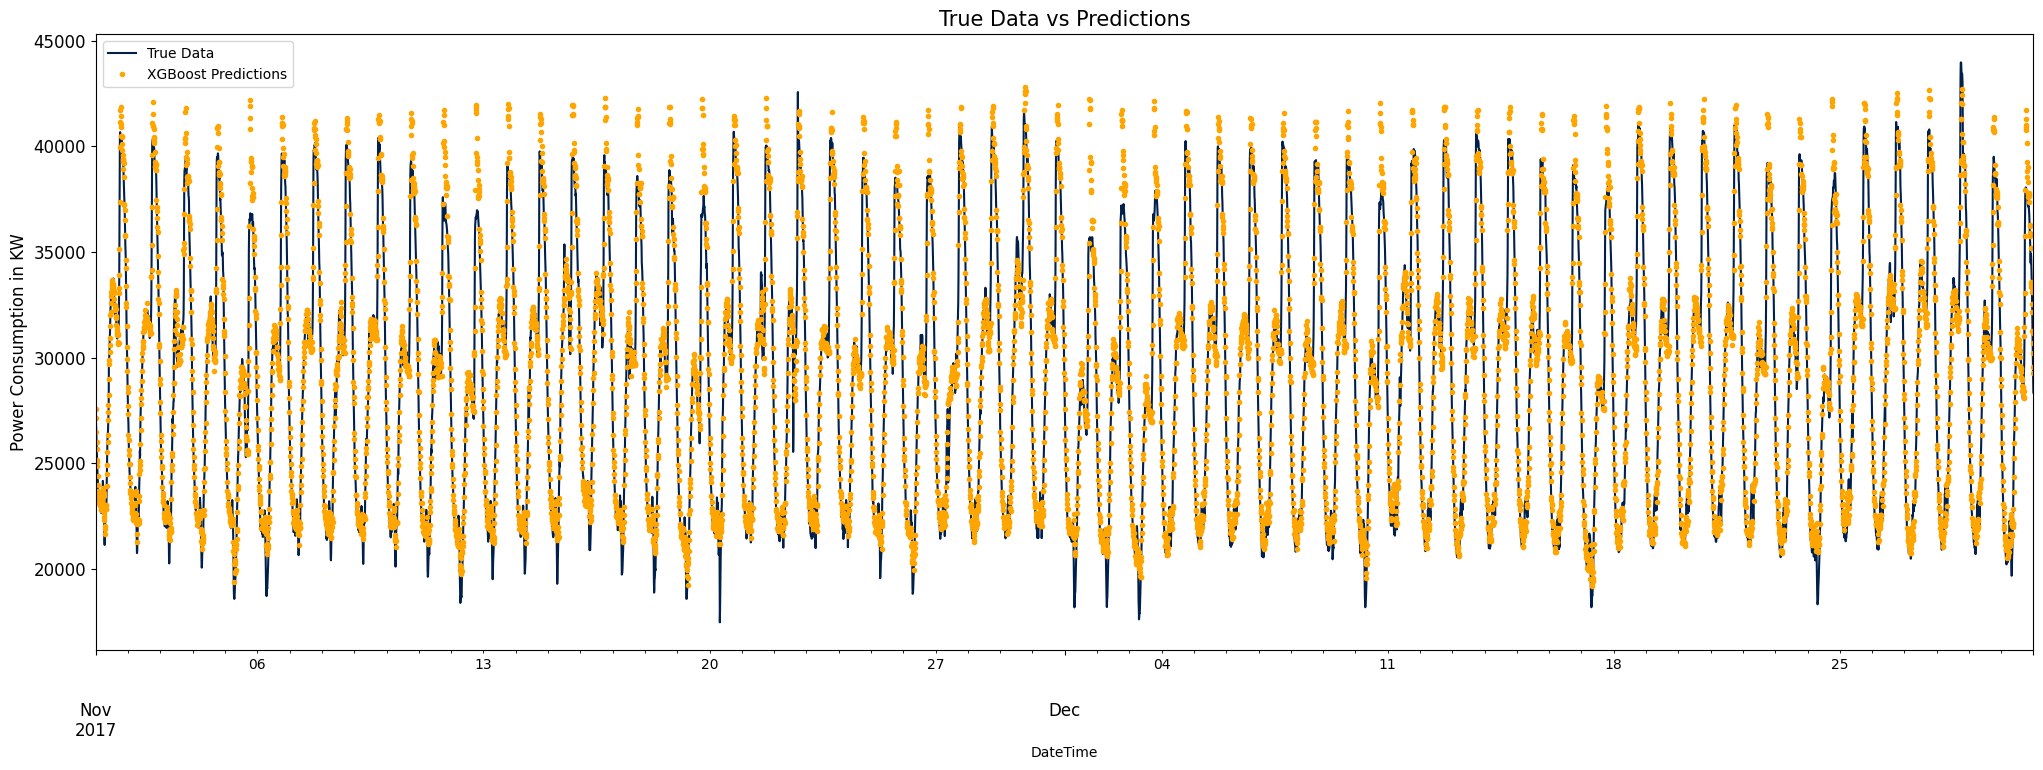

In [115]:
# Plotting predictions on chart to visually assess performance
ax = power.loc[(power.index >= '2017-11-01')]['Zone 1 Power Consumption'].plot(figsize=(25, 8), title='True Data vs Predictions', color = "#011f4b")
# power.loc[(power.index >= '2017-11-01')]['prediction_lr'].plot(style='.', color = "green")
power.loc[(power.index >= '2017-11-01')]['prediction_xgb'].plot(style='.', color = "orange")

plt.title('True Data vs Predictions', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('Power Consumption in KW', fontsize=12)
# plt.legend(['True Data','LR Predictions', 'XGBoost Predictions'])
plt.legend(['True Data', 'XGBoost Predictions'])

plt.show()

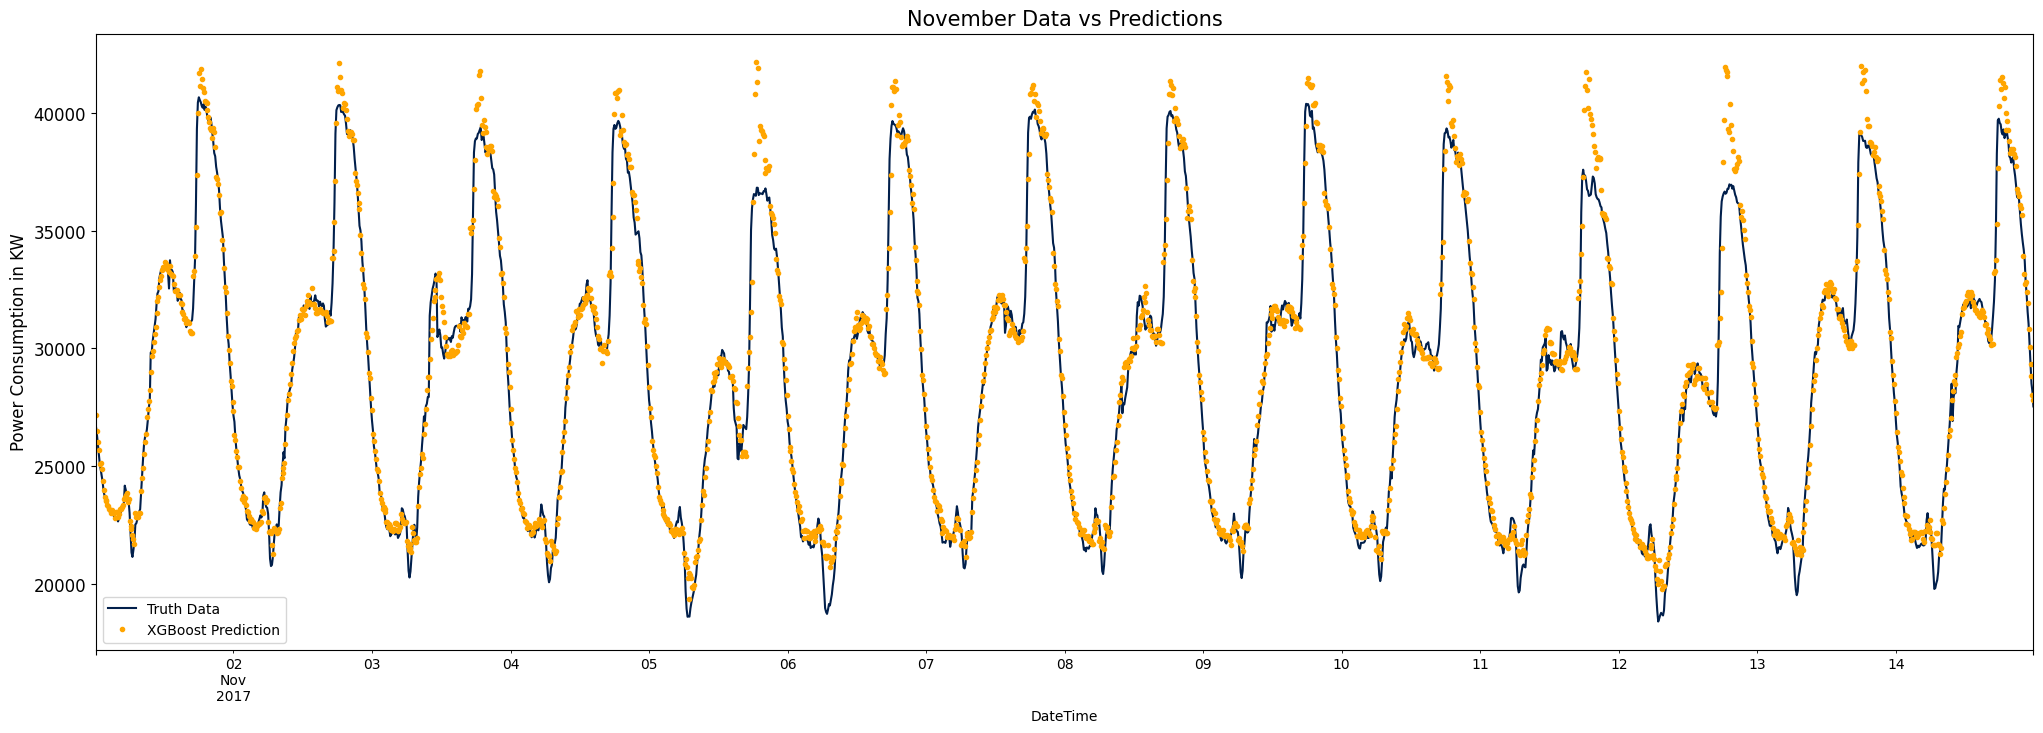

In [117]:
# Plotting first half of November predictions on chart to visually assess performance
ax = power.loc[(power.index > '2017-11-01') & (power.index < '2017-11-15')]['Zone 1 Power Consumption'].plot(figsize=(25, 8), title='November Data vs Predictions', color = "#011f4b")
# power.loc[(power.index > '2017-11-01') & (power.index < '2017-11-15')]['prediction_lr'].plot(style='.', color = "green")
power.loc[(power.index > '2017-11-01') & (power.index < '2017-11-15')]['prediction_xgb'].plot(style='.', color = "orange")

plt.title('November Data vs Predictions', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('Power Consumption in KW', fontsize=12)
# plt.legend(['Truth Data','LR Prediction', 'XGBoost Prediction'])
plt.legend(['Truth Data', 'XGBoost Prediction'])

plt.show()

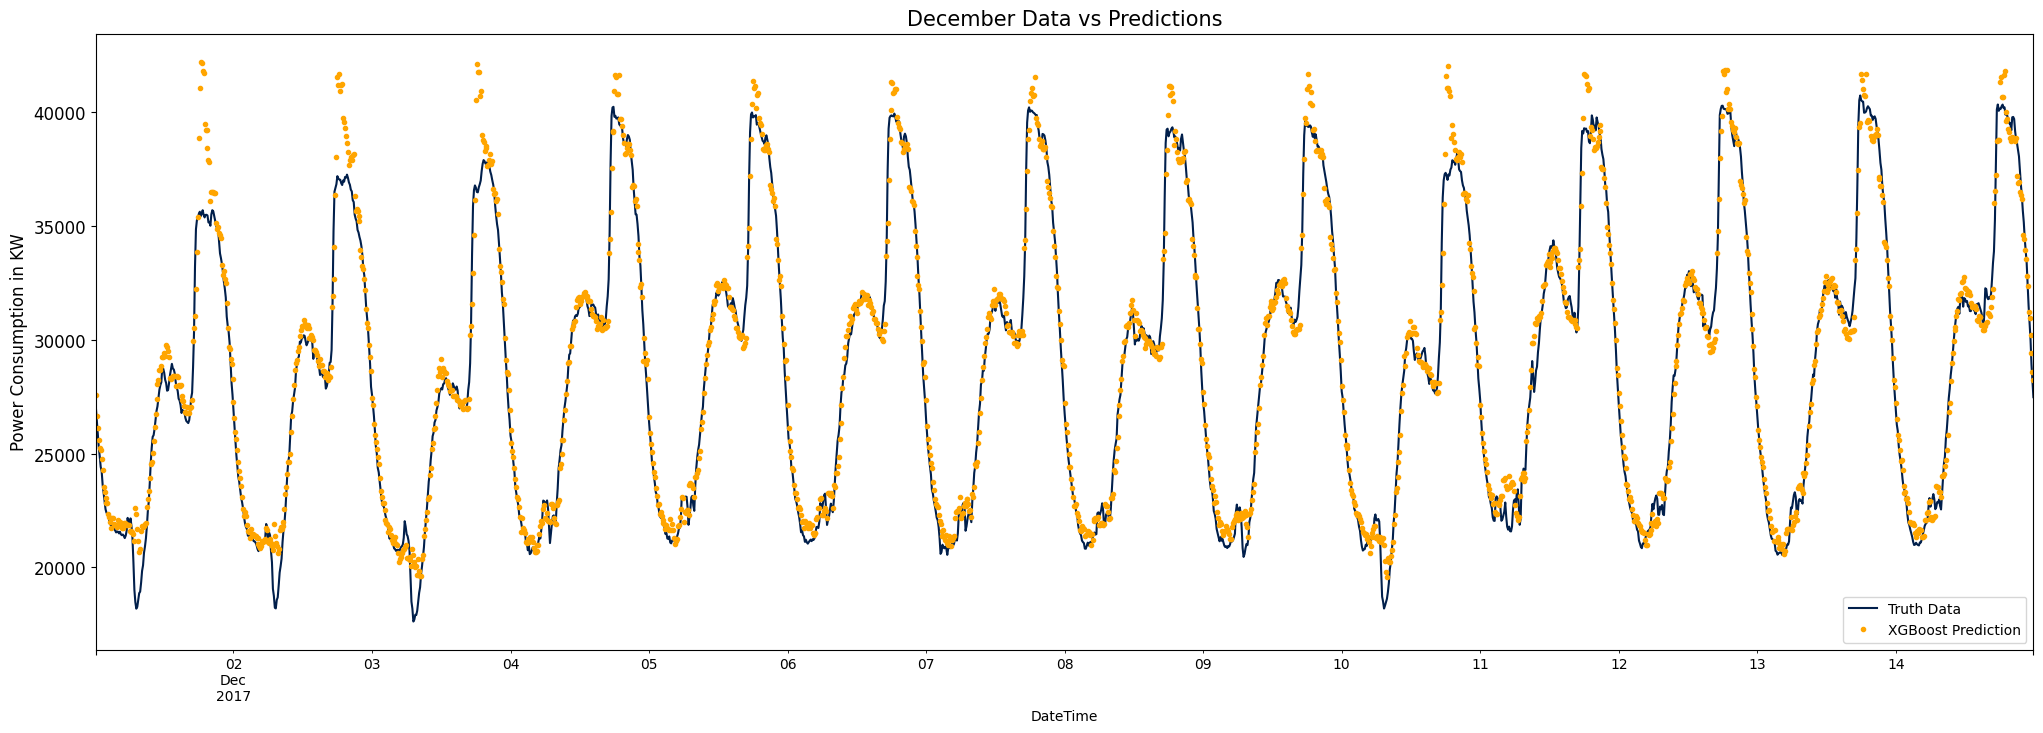

In [118]:
# Plotting first half of December predictions on chart to visually assess accuracy
ax = power.loc[(power.index > '2017-12-01') & (power.index < '2017-12-15')]['Zone 1 Power Consumption'].plot(figsize=(25, 8), title='December Data vs Predictions', color = "#011f4b")
# power.loc[(power.index > '2017-12-01') & (power.index < '2017-12-15')]['prediction_lr'].plot(style='.', color = "green")
power.loc[(power.index > '2017-12-01') & (power.index < '2017-12-15')]['prediction_xgb'].plot(style='.', color = "orange")

plt.title('December Data vs Predictions', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('Power Consumption in KW', fontsize=12)
# plt.legend(['Truth Data','LR Prediction', 'XGBoost Prediction'])
plt.legend(['Truth Data', 'XGBoost Prediction'])

plt.show()

### References
https://www.kaggle.com/code/gvaldata/time-series-forecasting-on-power-consumption-z1